In [1]:
import math
import numpy as np
from utils import single_roll


# From https://web.stanford.edu/~guertin/risk.notes.html
win_rate = np.array([
    [[0.417, 0.583, 0.],        # 1 vs 1
     [0.255, 0.745, 0.]],       # 1 vs 2
    [[0.579, 0.421, 0.],      # 2 vs 1
     [0.228, 0.324, 0.448]],    # 2 vs 2
    [[0.660, 0.340, 0.],      # 3 vs 1
     [0.371, 0.336, 0.293]]   # 3 vs 2
])

d1 = {}


def get_win_chance(attack_unit, defense_unit):
    global win_rate, d1

    if (attack_unit, defense_unit) in d1:
        return d1[(attack_unit, defense_unit)]

    if attack_unit == 0:
        c = 0.0
    elif defense_unit == 0:
        c = 1.0
    elif attack_unit == 1:
        if defense_unit == 1:
            c = win_rate[0, 0, 0]
        elif defense_unit == 2:
            c = win_rate[0, 1, 0]
        else:
            c = win_rate[0, 1, 0] * get_win_chance(attack_unit, defense_unit - 1)
    elif attack_unit == 2:
        if defense_unit == 1:
            c = win_rate[1, 0, 0] + \
                win_rate[1, 0, 1] * win_rate[0, 0, 0]
        elif defense_unit == 2:
            c = win_rate[1, 1, 0] + \
                win_rate[1, 1, 1] * win_rate[0, 0, 0]
        else:
            c = win_rate[1, 1, 0] * get_win_chance(attack_unit, defense_unit - 2) + \
                win_rate[1, 1, 1] * get_win_chance(attack_unit - 1, defense_unit - 1)
    elif attack_unit == 3:
        if defense_unit == 1:
            c = win_rate[2, 0, 0] + \
                win_rate[2, 0, 1] * win_rate[1, 0, 0] + \
                win_rate[2, 0, 1] * win_rate[1, 0, 1] * win_rate[0, 0, 0]
        else:
            c = win_rate[2, 1, 0] + \
                win_rate[2, 1, 1] * win_rate[1, 0, 0] + \
                win_rate[2, 1, 1] * win_rate[1, 0, 1] * win_rate[0, 0, 0] + \
                win_rate[2, 1, 2] * win_rate[0, 1, 0]
    else:
        if defense_unit == 1:
            c = win_rate[2, 0, 0] + \
                win_rate[2, 0, 1] * get_win_chance(attack_unit - 1, defense_unit)
        else:
            c = win_rate[2, 1, 0] * get_win_chance(attack_unit, defense_unit - 2) + \
                win_rate[2, 1, 1] * get_win_chance(attack_unit - 1, defense_unit - 1) + \
                win_rate[2, 1, 2] * get_win_chance(attack_unit - 2, defense_unit)
    d1[(attack_unit, defense_unit)] = c
    return c

d2 = {}
def get_win_chance2(attack_unit, defense_unit, left):
    global win_rate, d2

    if (attack_unit, defense_unit, left) in d2:
        return d2[(attack_unit, defense_unit, left)]

    if left < -defense_unit or left > attack_unit:
        c = 0.0
    elif attack_unit == 0:
        if left <= 0:
            c = 1.0
        else:
            c = 0.0
    elif defense_unit == 0:
        if left > 0:
            c = 1.0
        else:
            c = 0.0
    elif attack_unit == 1:
        if defense_unit == 1:
            if left == attack_unit:
                c = win_rate[0, 0, 0]
            else:
                c = win_rate[0, 0, 1]
        elif defense_unit == 2:
            if left == attack_unit:
                c = win_rate[0, 1, 0] * win_rate[0, 0, 0]
            elif left == 0:
                c = win_rate[0, 1, 0] * win_rate[0, 0, 1]
            else:
                c = win_rate[0, 1, 1]
        else:
            if left == attack_unit:
                c = win_rate[0, 1, 0] * get_win_chance2(attack_unit, defense_unit - 1, left)
            elif left == -defense_unit:
                c = win_rate[0, 1, 1]
            else:
                c = win_rate[0, 1, 0] * get_win_chance2(attack_unit, defense_unit - 1, left)
    elif attack_unit == 2:
        if defense_unit == 1:
            if loss1 == 0:
                c = win_rate[1, 0, 0]
            elif loss1 == 1:
                c = win_rate[1, 0, 1] * win_rate[0, 0, 0]
            else:
                c = win_rate[1, 0, 2]
        elif defense_unit == 2:
            if loss1 == 0:
                c = win_rate[1, 1, 0]
            elif loss1 == 1:
                c = win_rate[1, 1, 1] * win_rate[0, 0, 0]
            else:
                c = win_rate[1, 1, 1] * win_rate[0, 1, 1]
        else:
            if loss1 == 0:
                c = win_rate[1, 1, 0] * get_win_chance2(attack_unit, defense_unit - 2, loss1, loss2 - 2)
            elif loss1 == 1:
                c = win_rate[1, 1, 0] * get_win_chance2(attack_unit, defense_unit - 2, loss1, loss2 - 2) + \
                    win_rate[1, 1, 1] * get_win_chance2(attack_unit - 1, defense_unit - 1, loss1 - 1, loss2 - 1)
            else:
                c = win_rate[1, 1, 2] + \
                    win_rate[1, 1, 0] * get_win_chance2(attack_unit, defense_unit - 2, loss1, loss2 - 2) + \
                    win_rate[1, 1, 1] * get_win_chance2(attack_unit - 1, defense_unit - 1, loss1 - 1, loss2 - 1)
    elif attack_unit == 3:
        if defense_unit == 1:
            if loss1 == 0:
                c = win_rate[2, 0, 0]
            elif loss1 == 1:
                c = win_rate[2, 0, 1] * win_rate[1, 0, 0]
            elif loss1 == 2:
                c = win_rate[2, 0, 1] * win_rate[1, 0, 1] * win_rate[0, 0, 0]
            else:
                c = win_rate[2, 0, 1] * win_rate[1, 0, 1] * win_rate[0, 0, 1]
        else:
            if loss1 == 0:
                c = win_rate[2, 1, 0] * get_win_chance2(attack_unit, defense_unit - 2, loss1, loss2 - 2)
            elif loss1 == 1:
                c = win_rate[2, 1, 0] * get_win_chance2(attack_unit, defense_unit - 2, loss1, loss2 - 2) + \
                    win_rate[2, 1, 1] * get_win_chance2(attack_unit - 1, defense_unit - 1, loss1 - 1, loss2 - 1)
            else:
                c = win_rate[2, 1, 2] * get_win_chance2(attack_unit - 2, defense_unit, loss1 - 2, loss2) + \
                    win_rate[2, 1, 1] * get_win_chance2(attack_unit - 1, defense_unit - 1, loss1 - 1, loss2 - 1) + \
                    win_rate[2, 1, 0] * get_win_chance2(attack_unit, defense_unit - 2, loss1, loss2 - 2)
    else:
        if defense_unit == 1:
            if loss1 == 0:
                c = win_rate[2, 0, 0]
            else:
                c = win_rate[2, 0, 1] * get_win_chance2(attack_unit - 1, defense_unit, loss1 - 1, loss2 - 1)
        else:
            c = win_rate[2, 1, 0] * get_win_chance2(attack_unit, defense_unit - 2, loss1, loss2 - 2) + \
                win_rate[2, 1, 1] * get_win_chance2(attack_unit - 1, defense_unit - 1, loss1 - 1, loss2 - 1) + \
                win_rate[2, 1, 2] * get_win_chance2(attack_unit - 2, defense_unit, loss1 - 2, loss2)
#     print(attack_unit, defense_unit, loss, c)
    d2[(attack_unit, defense_unit, loss1, loss2)] = c
    return c

for i in range(1, 100):
    for j in range(1, 100):
        for r in range(0, i):
            get_win_chance2(i, j, r)

print(len(d2))


# from mpl_toolkits import mplot3d

#
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# X, Y, Z, C = [k[0] for k in d.keys()], [k[1] for k in d.keys()], [v for v in d.values()], [k[2] for k in d.keys()]
# img = ax.scatter(X, Y, Z, c=C, cmap=plt.hot()) # rstride=1, cstride=1, cmap='viridis', edgecolor='none')
# fig.colorbar(img)
# ax.set_xlabel('Attack')
# ax.set_ylabel('Defense')
# # ax.set_zlabel('Loss')
# ax.view_init(20, 70)
#
#
# plt.show()


NameError: name 'loss1' is not defined

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_me(x, y, data):
    X = [k[2] for k, v in data.items() if k[0] == x and k[1] == y and 0 <= k[2] <= x]
    Y = [v for k, v in data.items() if k[0] == x and k[1] == y and 0 <= k[2] <= x]
    W = [k[3] for k, v in data.items() if k[0] == x and k[1] == y and 0 <= k[3] <= y]
    Z = [v for k, v in data.items() if k[0] == x and k[1] == y and 0 <= k[3] <= y]
    print(X)
    print(Y)
    print(W)
    print(Z)
    print(X[np.argmax(Y)], np.mean(Y), np.std(Y), sum(Y))
    print(W[np.argmax(Z)], np.mean(Z), np.std(Z), sum(Z))
    fig, ax = plt.subplots()
    ax.plot(X, Y)
    ax.plot(W, Z)
    ax.grid()
    plt.show()  


In [2]:
from scipy.stats import norm

a, b = 40, 10
plot_me(a, b, d2)
print(get_win_chance(a, b))
# x_axis = np.arange(0, a, 0.1)

# plt.plot(x_axis, norm.pdf(x_axis,16,6))


NameError: name 'plot_me' is not defined

In [12]:
dd = {}
n = 1000
a, b = 15, 20
for i in range(n):
    ta = int(a)
    td = int(b)
    while ta > 0 and td > 0:
        la, ld = single_roll(ta, td)
        ta -= la
        td -= ld
    
    left = ta if ta > td else -td
    if (a, b, left) not in dd:
        dd[(a, b, left)] = 0.0
    dd[(a, b, left)] += 1.0/n

In [13]:
d4 = {(a, b, i-b): dd[(a,b,i-b)] for i in range(len(dd)+1) if (a,b,i-b) in dd}
plot_me(a, b, d4)
d4

IndexError: tuple index out of range

In [14]:
d3 = {}
def get_chance(attack_unit, defense_unit, left):
    global win_rate, d3
    i_a = min(attack_unit - 1, 2)
    i_d = min(defense_unit - 1, 1)
    #print(attack_unit, defense_unit, left)
    if (attack_unit, defense_unit, left) in d3:
        c = d3[(attack_unit, defense_unit, left)]
        #print(attack_unit, defense_unit, left, c)
        return c

    c = 0.0
    if left < -defense_unit or left > attack_unit:
        c = 0.0
    elif defense_unit < 0 or attack_unit < 0:
        c = 0.0
    elif attack_unit == 0:
        if left == -defense_unit:
            c = 1.0
        else:
            c = 0.0
    elif defense_unit == 0:
        if left == attack_unit:
            c = 1.0
        else:
            c = 0.0
    else:        
        c = win_rate[i_a, i_d, 0] * get_chance(attack_unit, defense_unit - min(min(i_a, i_d) + 1, 2), left) + \
            win_rate[i_a, i_d, 1] * get_chance(attack_unit - 1, defense_unit - min(i_a, 1), left) + \
            win_rate[i_a, i_d, 2] * get_chance(attack_unit - 2, defense_unit, left)
    #print(attack_unit, defense_unit, left, c)
    d3[(attack_unit, defense_unit, left)] = c
    return c

In [15]:
get_chance(5, 3, -1)

0.040446578336175

In [16]:
for i in range(1, 100):
    for j in range(1, 100):
        for r in range(-j, i):
            get_chance(i, j, r)

print(len(d3))

1043851


In [17]:
def plot_me(x, y, data):
    X = [k[2] for k, v in data.items() if k[0] == x and k[1] == y and -y <= k[2] <= x]
    Y = [v for k, v in data.items() if k[0] == x and k[1] == y and -y <= k[2] <= x]
    win = sum([v for k, v in data.items() if k[0] == x and k[1] == y and 0 <= k[2] <= x])
    print(X[np.argmax(Y)], np.max(Y), sum(Y), win)
    fig, ax = plt.subplots()
    ax.plot(X, Y)
    ax.grid()
    plt.show()


-4 0.448 1.0 0.09157402170000001


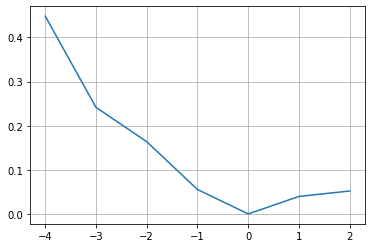

In [18]:
plot_me(2, 4, d3)

-6 0.1659419095 1.0 0.12873976072661206


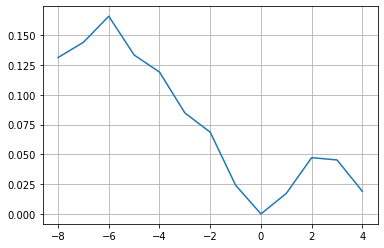

In [19]:
plot_me(4, 8, d3)

-10 0.09426682072253935 1.0 0.0922928138836063


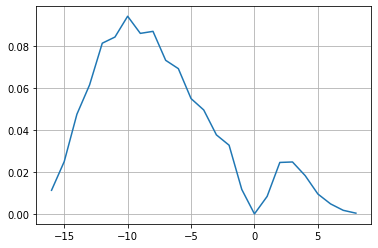

In [20]:
plot_me(8, 16, d3)

-5 0.448 1.0 0.0620794555335


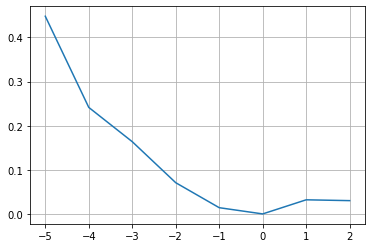

In [24]:
plot_me(2, 5, d3)

In [25]:
get_chance(2,5,-5)

0.448